119.0
157.5
(248, 251)
(306, 153)
113.87712676389407


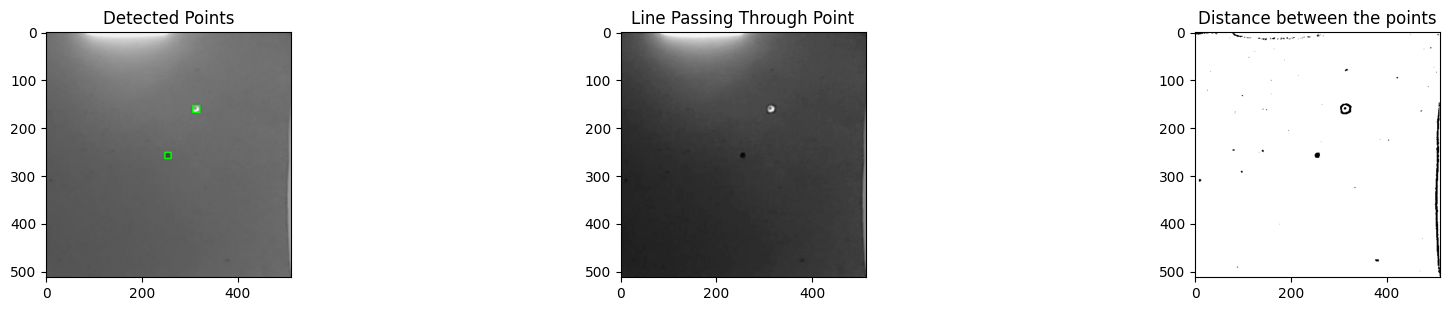

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

img = cv2.imread("/content/web_5790.jpg")
resized_img = image_resize(img, 512, 512)

# cv2.circle(img, (79, 95), 5, (0, 0, 255), -1)
# cv2.circle(img, (457, 22), 5, (0, 0, 255), -1)
# cv2.circle(img, (12, 473), 5, (0, 0, 255), -1)
# cv2.circle(img, (495, 495), 5, (0, 0, 255), -1)

pts1 = np.float32([[93, 8], [367, 57], [91, 348], [372, 325]])
pts2 = np.float32([[0, 0], [512, 0], [0, 512], [512, 512]])


matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(resized_img, matrix, (512, 512))
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 1)

thAdaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

contours, hierarchy = cv2.findContours(thAdaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
font = cv2.FONT_HERSHEY_COMPLEX
points = []
for c in contours:
        if cv2.contourArea(c) < 400 and cv2.contourArea(c) > 85 :
          print(cv2.contourArea(c))
          x,y,w,h = cv2.boundingRect(c)
          cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255,0), 2)
          string = "(" + str(x) + ", " + str(y) + ")"
          center = (x,y)
          # cv2.putText(thAdaptive, string, (x, y), font, 1, (255, 0, 0))
          # print (center)
          points.append(center)
        else:
          continue


plt.figure(figsize=(21,7))

plt.subplot(2, 3, 1)
plt.imshow(result)
plt.title("Detected Points")

# cv2.line(output,points[1],points[2],(255,255,0),2)

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Line Passing Through Point")

# dist = math.dist(points[1], points[2])
# print(points)

# mid_point = midpoint(points[1], points[2])
# print(f"distance = {math.dist(points[1], points[2])}")
# print(mid_point)

# cv2.putText(output, f"{dist}", mid_point, font, 1, (255, 0, 0))

plt.subplot(2, 3, 3)
plt.imshow(thAdaptive, cmap="gray")
plt.title("Distance between the points")

print(points[0])
print(points[1])
print(math.dist(points[0], points[1]))

# print(points)
# plt.imshow(result)
# plt.imshow("Perspective transformation", result)